In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Downloading the data

In [2]:
games = pd.read_csv("C://Users//48660//Desktop//NBA dataset//games.csv")
column_names = games.columns.values
seasons = games['SEASON'].unique()
print("Names of columns: ", column_names, "\n \n")

Names of columns:  ['GAME_DATE_EST' 'GAME_ID' 'GAME_STATUS_TEXT' 'HOME_TEAM_ID'
 'VISITOR_TEAM_ID' 'SEASON' 'TEAM_ID_home' 'PTS_home' 'FG_PCT_home'
 'FT_PCT_home' 'FG3_PCT_home' 'AST_home' 'REB_home' 'TEAM_ID_away'
 'PTS_away' 'FG_PCT_away' 'FT_PCT_away' 'FG3_PCT_away' 'AST_away'
 'REB_away' 'HOME_TEAM_WINS'] 
 



Basic information

In [3]:
print("Dataframe shape: ",games.shape, "\n \n")
#GAMES INFO
print("Dataframe info: \n")
games.info()
print("\n \n")

Dataframe shape:  (26651, 21) 
 

Dataframe info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  f

Describing basic statistical characteristics

In [4]:
games_deleted_columns = games.drop(['GAME_ID', 'GAME_STATUS_TEXT' ,'HOME_TEAM_ID',
 'VISITOR_TEAM_ID', 'SEASON' ,'TEAM_ID_home', 'TEAM_ID_away', 'GAME_DATE_EST'], axis=1)  #deleting unnecessary columns (team, place in league)
column_names = games_deleted_columns.columns.values

In [5]:
describe = games_deleted_columns.describe()
print("stats describe: \n", describe, "\n \n")

stats describe: 
            PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home      AST_home  \
count  26552.000000  26552.000000  26552.000000  26552.000000  26552.000000   
mean     103.455898      0.460735      0.760377      0.356023     22.823441   
std       13.283370      0.056676      0.100677      0.111164      5.193308   
min       36.000000      0.250000      0.143000      0.000000      6.000000   
25%       94.000000      0.422000      0.697000      0.286000     19.000000   
50%      103.000000      0.460000      0.765000      0.357000     23.000000   
75%      112.000000      0.500000      0.833000      0.429000     26.000000   
max      168.000000      0.684000      1.000000      1.000000     50.000000   

           REB_home      PTS_away   FG_PCT_away   FT_PCT_away  FG3_PCT_away  \
count  26552.000000  26552.000000  26552.000000  26552.000000  26552.000000   
mean      43.374284    100.639876      0.449732      0.758816      0.349489   
std        6.625769     13.435868

In [6]:
games_normalized = games_deleted_columns

#optional normalization
#games_normalized = (games_deleted_columns - games_deleted_columns.min()) / (games_deleted_columns.max() - games_deleted_columns.min())

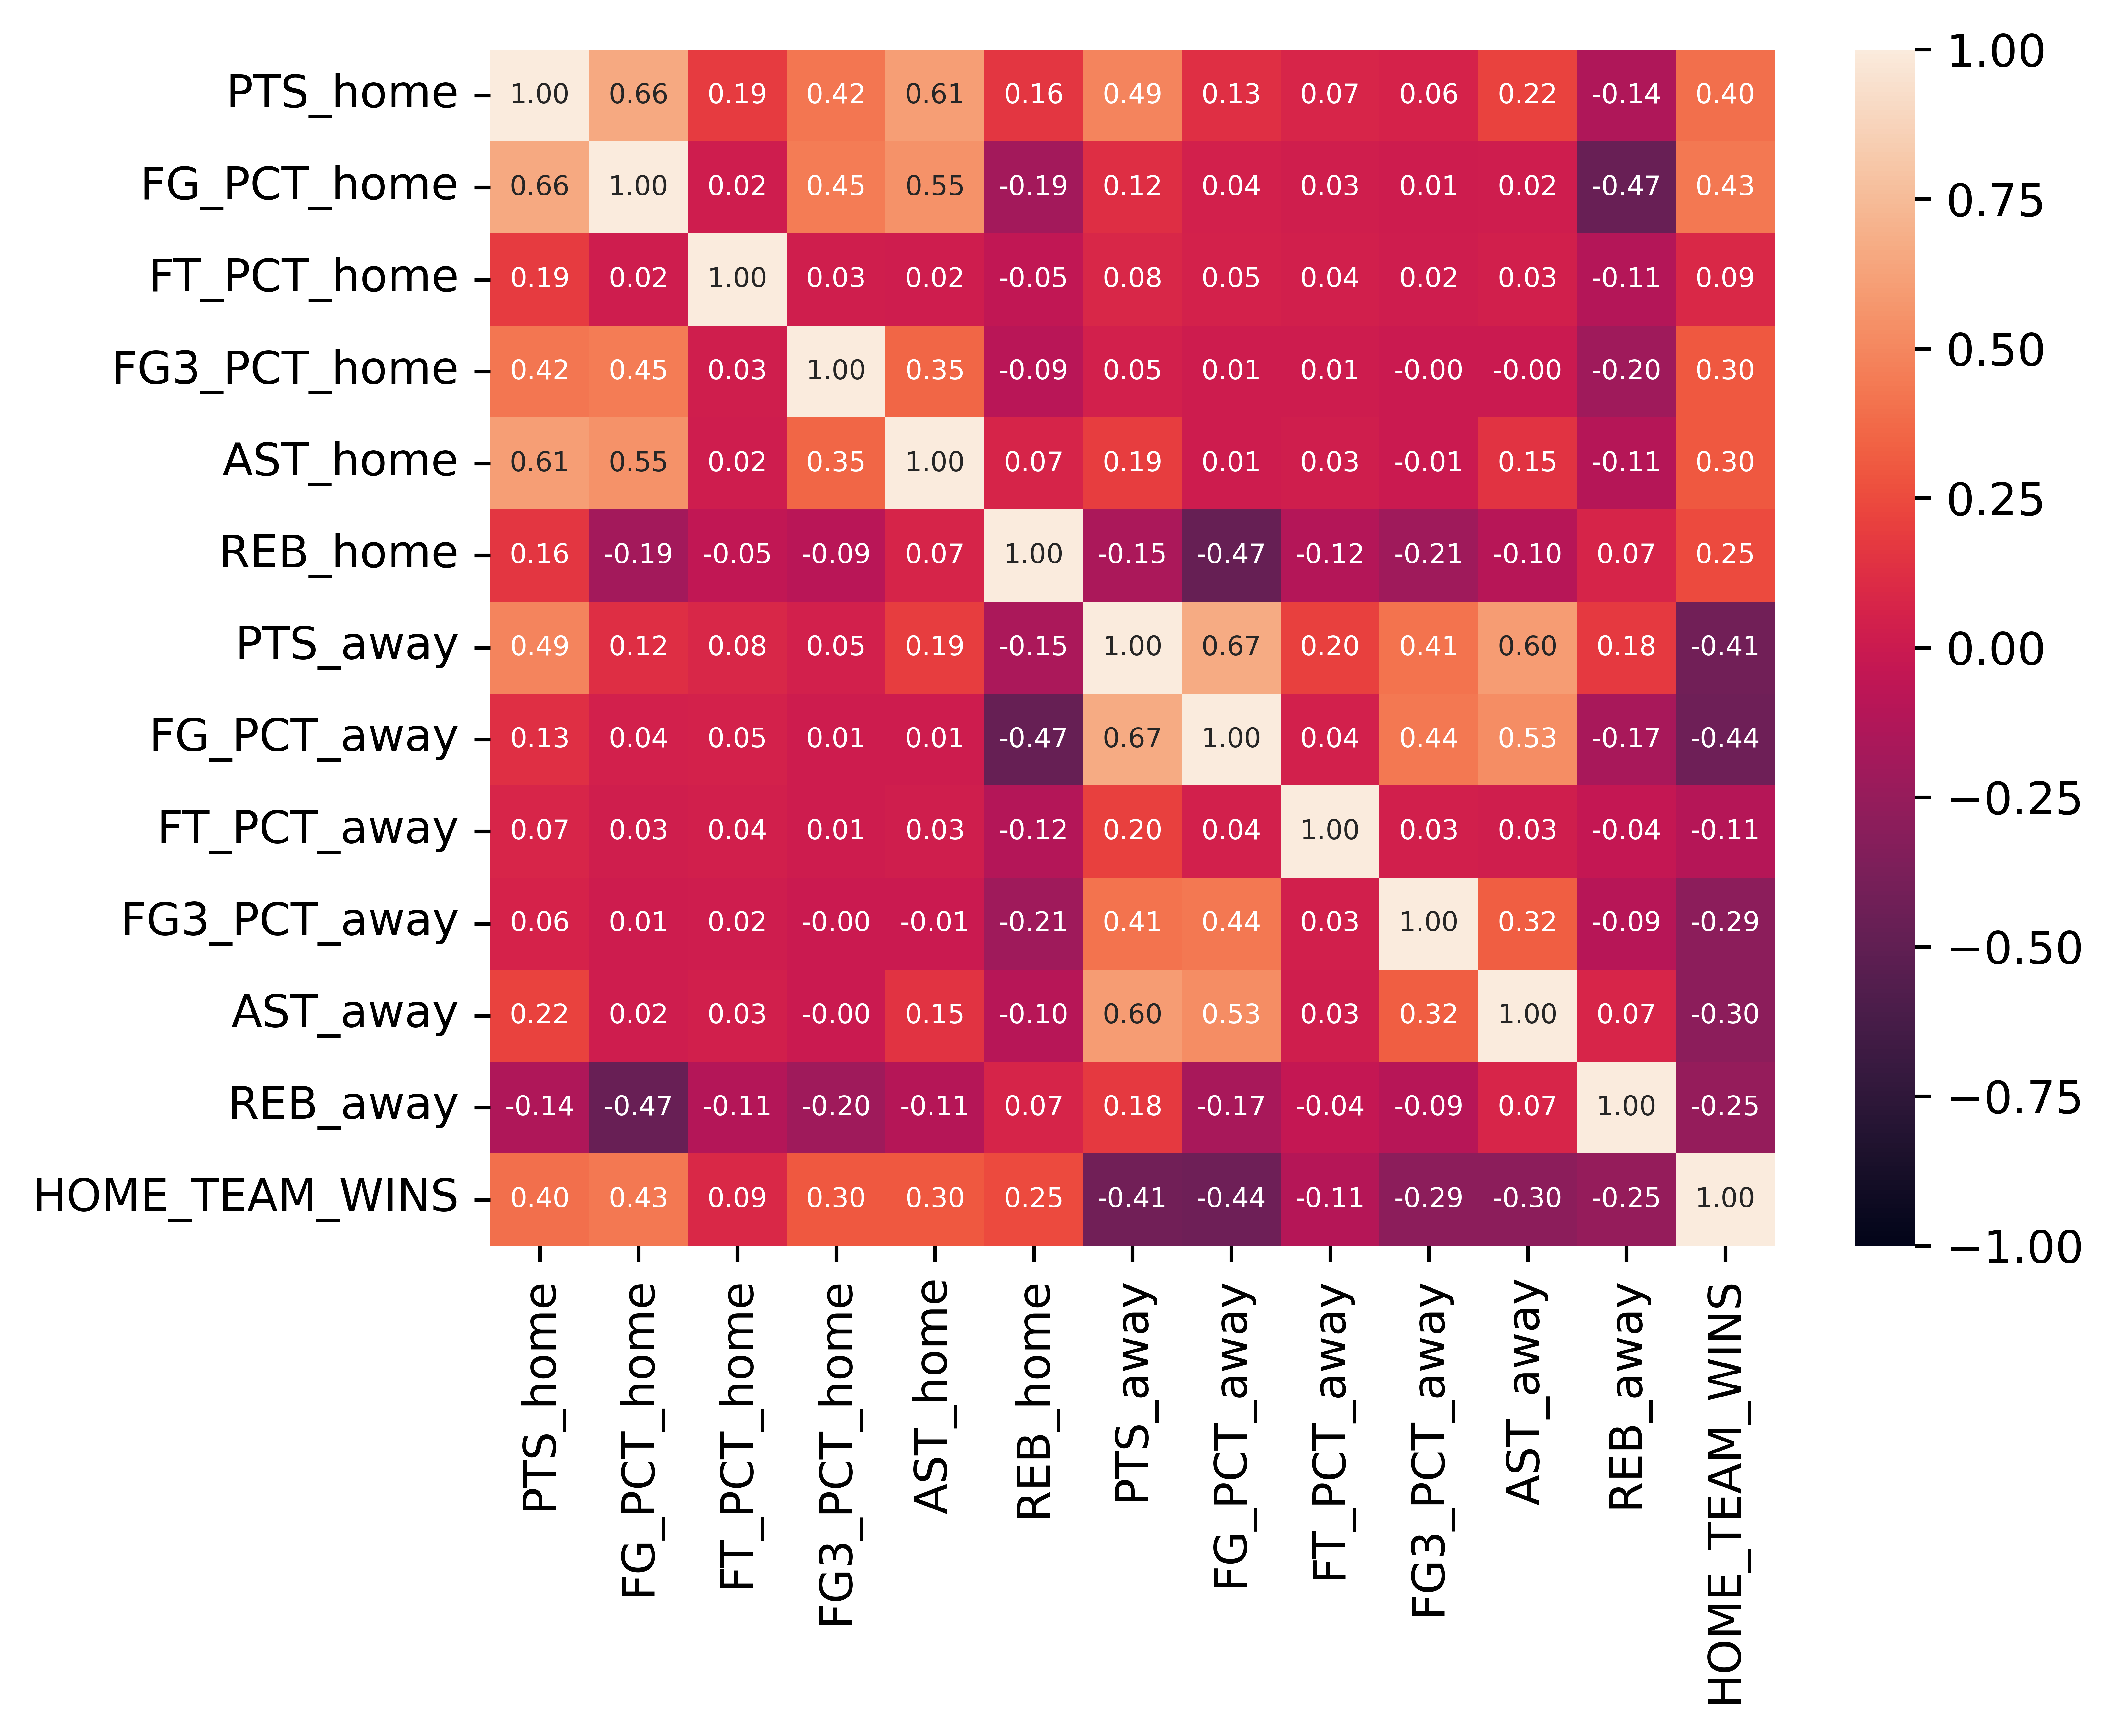

In [7]:
matrix = games_normalized.corr()
plt.figure(dpi = 1000)
sns.heatmap(matrix, vmin = -1, vmax = 1, xticklabels=games_normalized.columns,
            annot = True, fmt = '.2f',
            annot_kws = {"fontsize" : 6}
            )
plt.savefig('Heatmap.png', dpi = 100)
plt.show()

Boxplots of data collectively

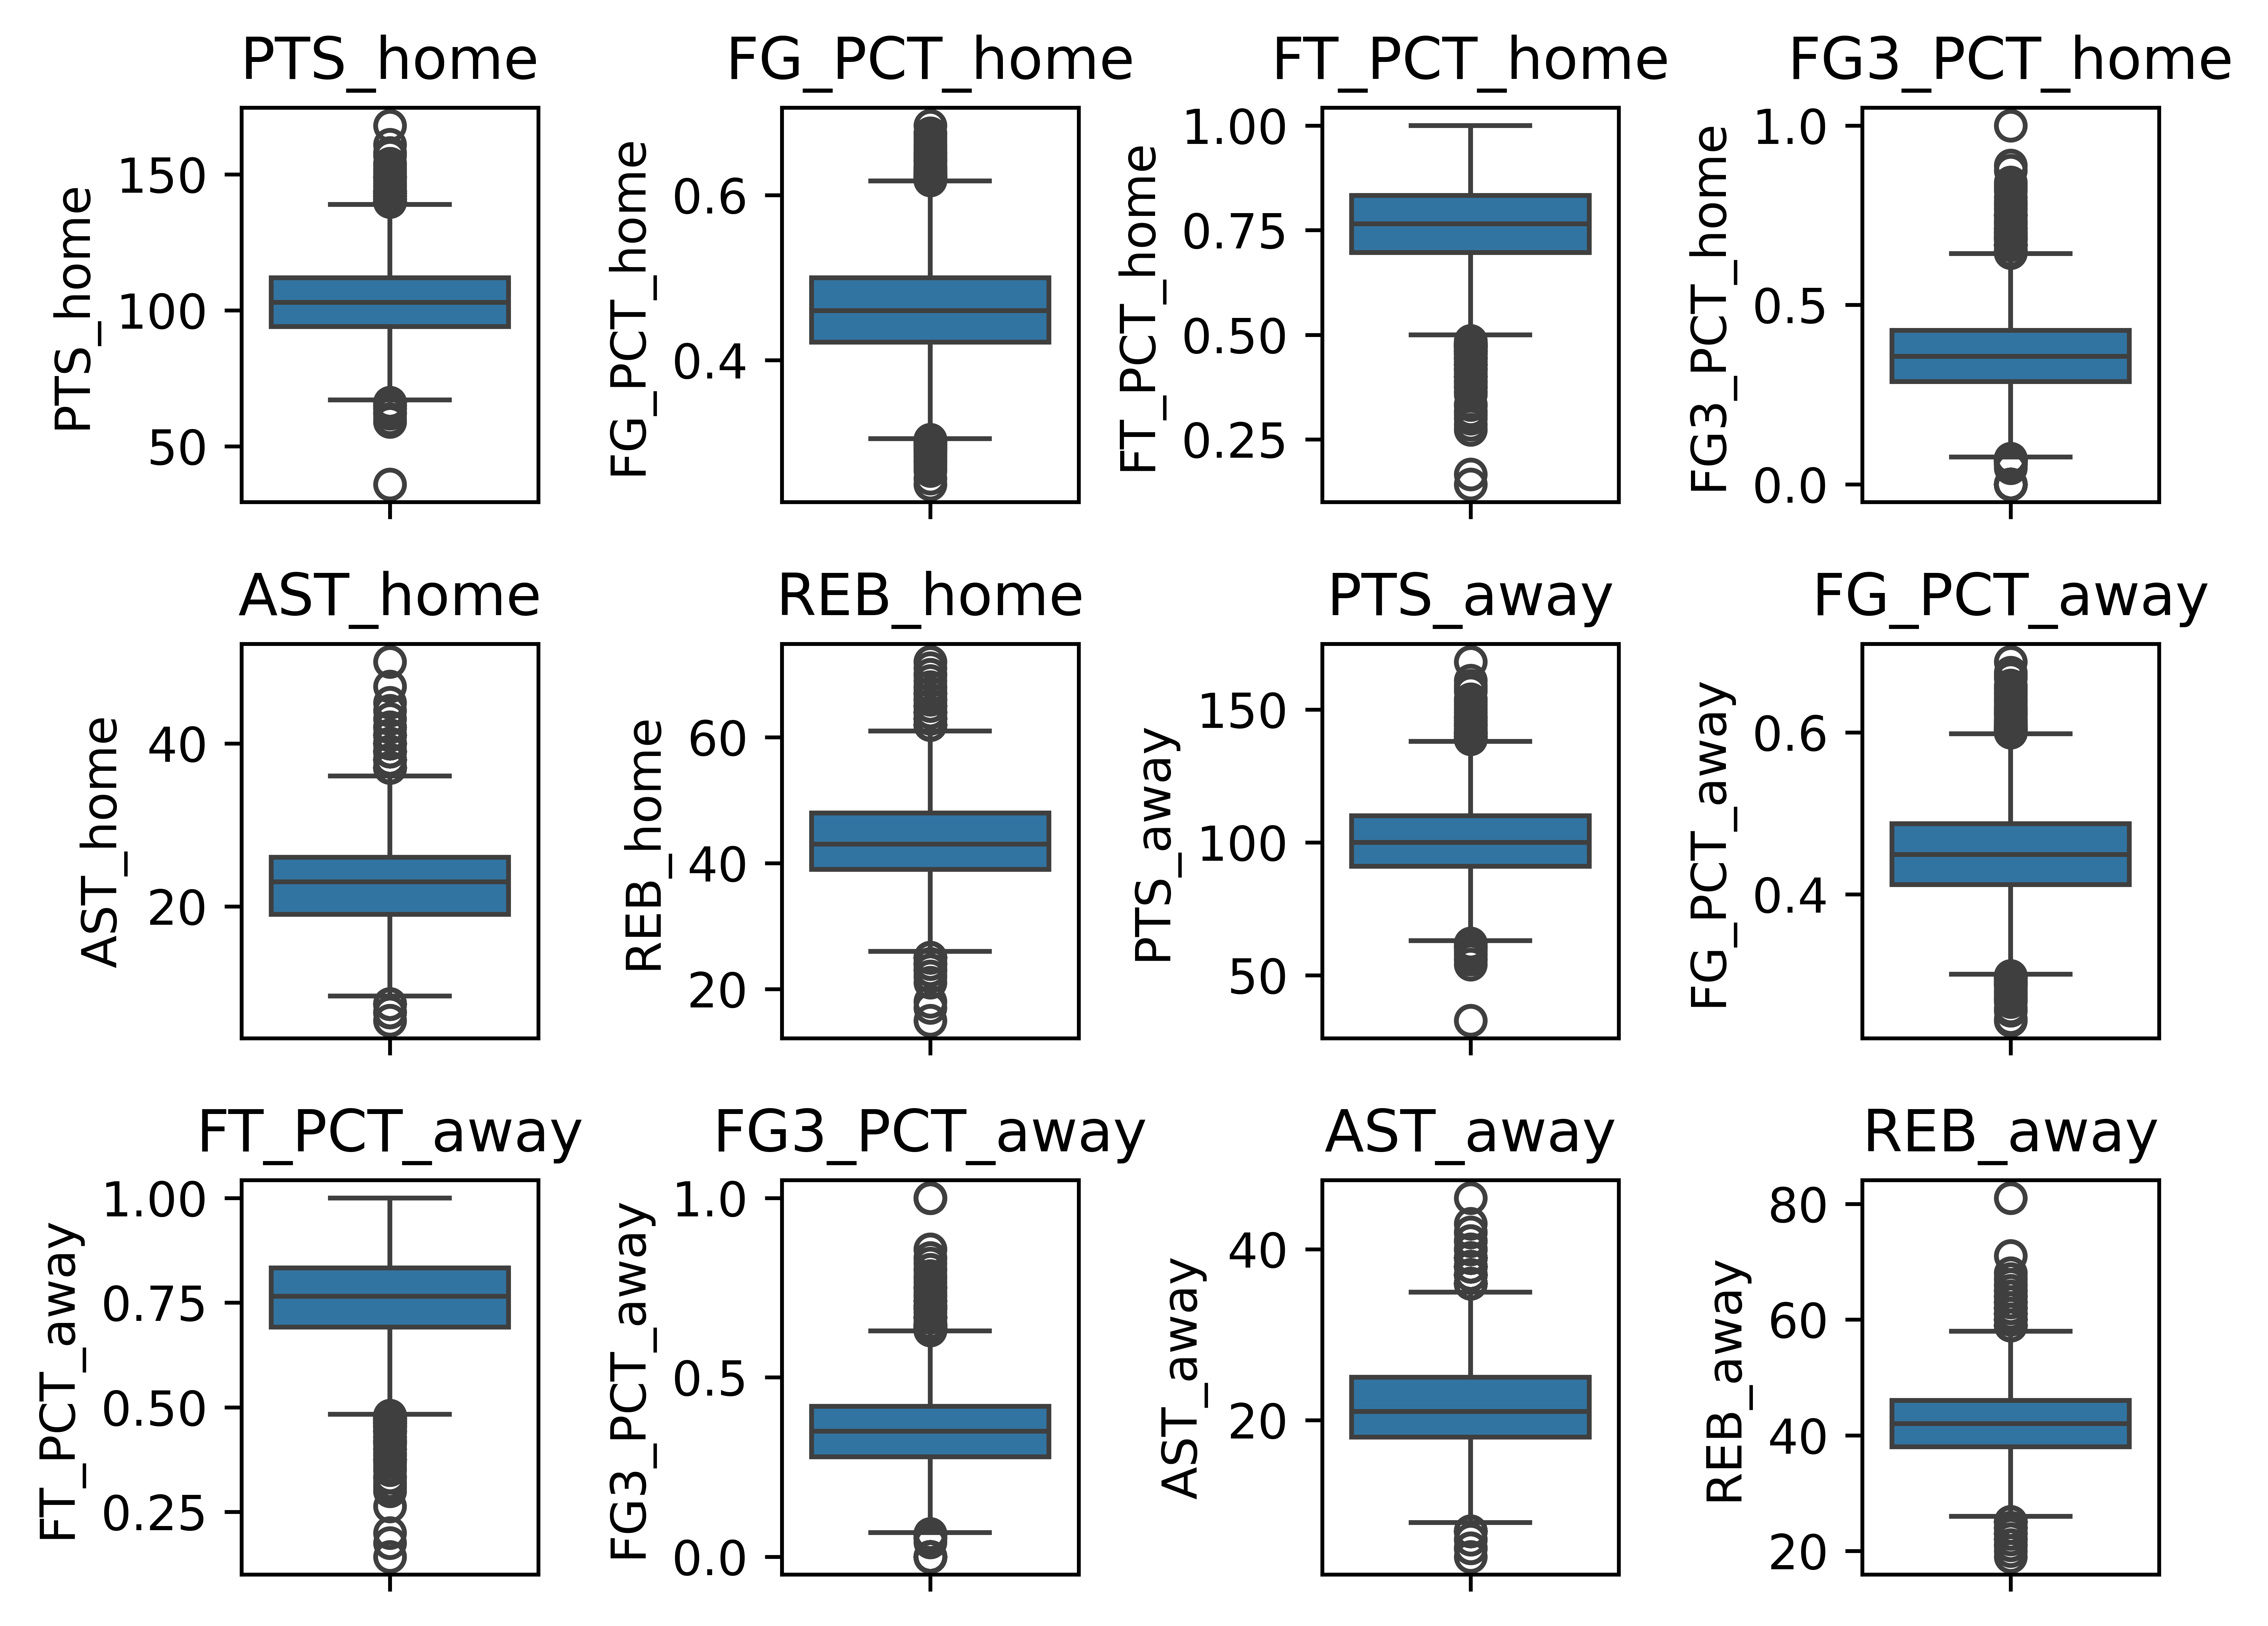

In [9]:
plt.subplots(nrows=3, ncols=4, dpi=1000)  # Adjusted ncols to 4
for index in range(12):
    data = games_normalized[column_names[index]]
    plt.subplot(3, 4, index+1)
    sns.boxplot(data)
    plt.title(column_names[index])

plt.tight_layout()  # Add this line to adjust subplot spacing
plt.show()

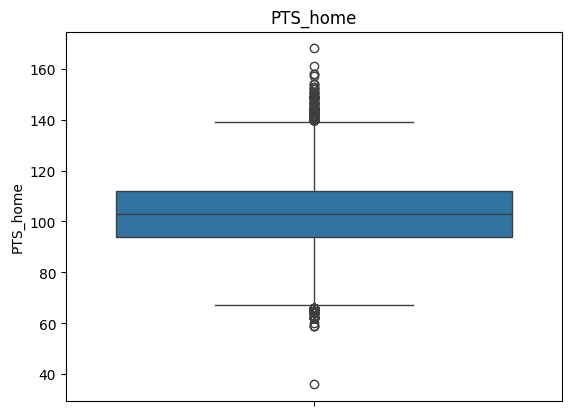

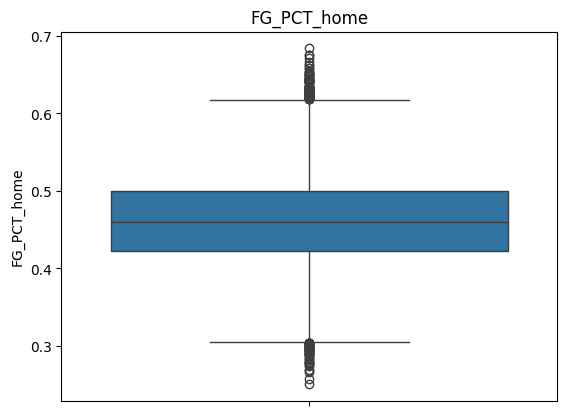

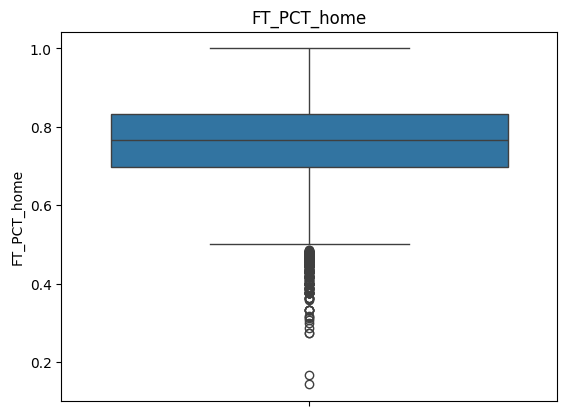

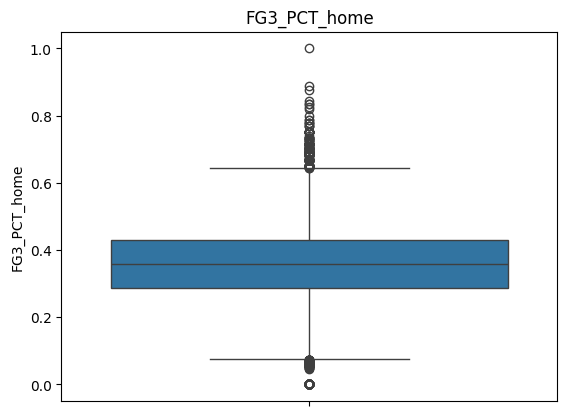

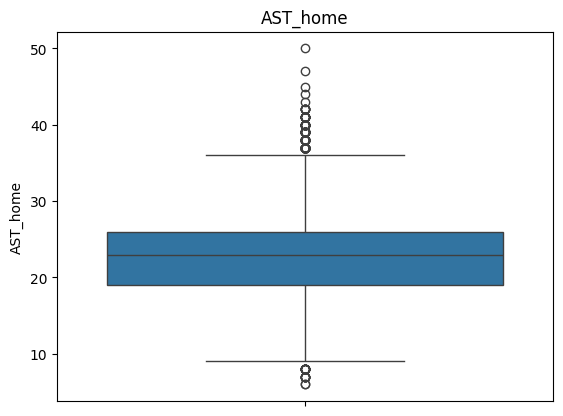

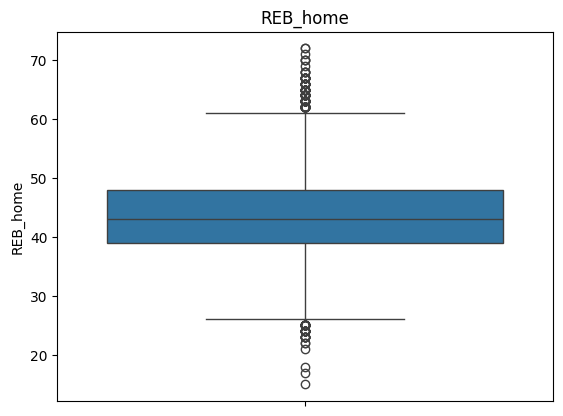

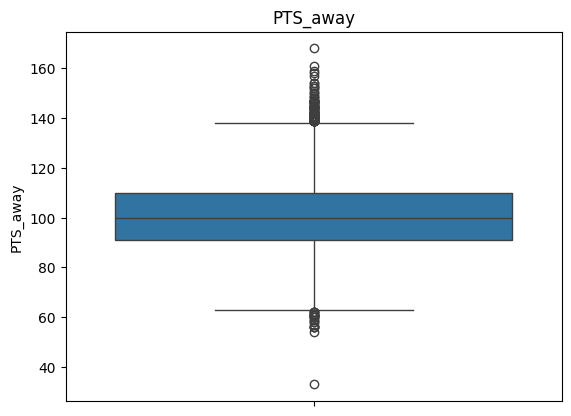

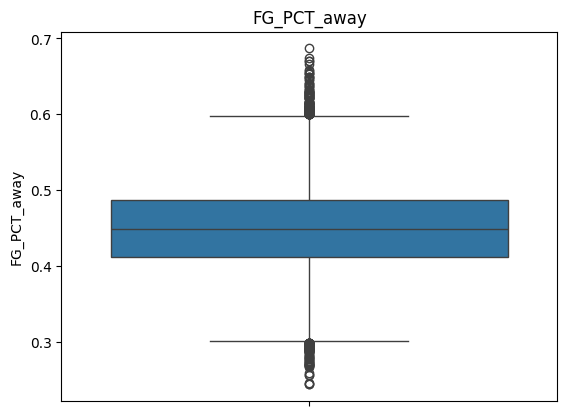

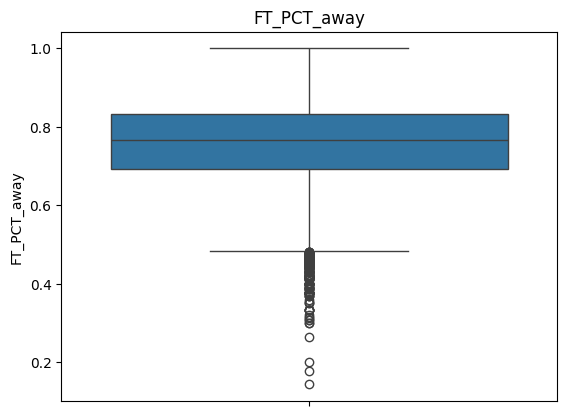

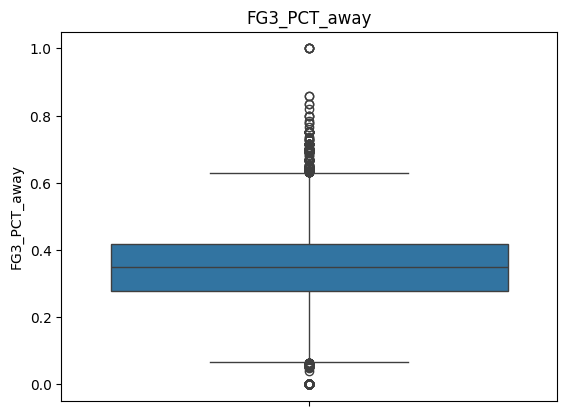

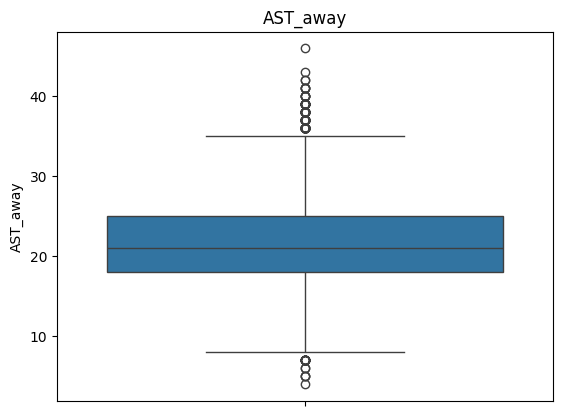

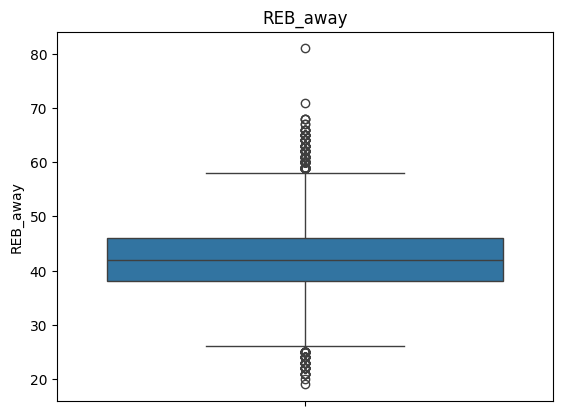

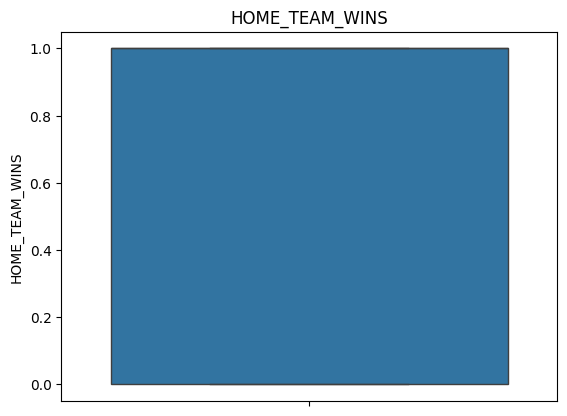

In [11]:
outliers_num = []
for index in range(len(column_names)):
    #tworzenie boxplotow kazdy osobno
    data =  games_normalized[column_names[index]]
    plt.figure()
    sns.boxplot(data =data)
    plt.title(column_names[index])
    plt.show()

    #numbers of outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = ((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR)))
    outliers_num.append(sum(outlier_condition))

In [12]:
outliers_df = pd.DataFrame({'Outliers': outliers_num, 'Columns': column_names})
print("Number of outliers: \n", outliers_df)

Number of outliers: 
     Outliers         Columns
0        207        PTS_home
1        153     FG_PCT_home
2        209     FT_PCT_home
3        381    FG3_PCT_home
4        215        AST_home
5        201        REB_home
6        134        PTS_away
7        197     FG_PCT_away
8        250     FT_PCT_away
9        359    FG3_PCT_away
10       187        AST_away
11       349        REB_away
12         0  HOME_TEAM_WINS
